In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [3]:
# "rfm.csv" 읽고 CustomerID 인덱스로 지정하기
rfm = pd.read_csv("rfm.csv",index_col='user_id')
rfm.shape

(18684, 9)

In [4]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
435648894,26,1,388.13,2,1,4,214,7,silver
437371552,30,1,179.14,1,1,2,112,4,silver
450756413,29,1,43.73,1,1,1,111,3,silver
456810531,7,1,133.35,4,1,2,412,7,silver
473668240,23,1,149.04,2,1,2,212,5,silver
...,...,...,...,...,...,...,...,...,...
566188229,1,1,221.34,5,5,3,553,13,platinum
566210490,1,1,514.78,5,5,4,554,14,platinum
566227458,1,1,465.91,5,5,4,554,14,platinum


In [5]:
# Recency, Frequency, MonetaryValue 만 따로 rfm_cluster 변수에 담아 사용하기
rfm_cluster = rfm.iloc[:,:3]
print(rfm_cluster.shape)
rfm_cluster.head(3)

(18684, 3)


,Recency,Frequency,MonetaryValue
user_id,,,
435648894,26,1,388.13
437371552,30,1,179.14
450756413,29,1,43.73


In [6]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,18684.000000,18684.000000,18684.000000
mean,15.103725,1.101263,409.069331
std,9.348765,0.431114,487.438853
min,1.000000,1.000000,2.450000
25%,7.000000,1.000000,131.530000
50%,13.000000,1.000000,243.470000
75%,24.000000,1.000000,506.282500
max,31.000000,12.000000,15507.000000


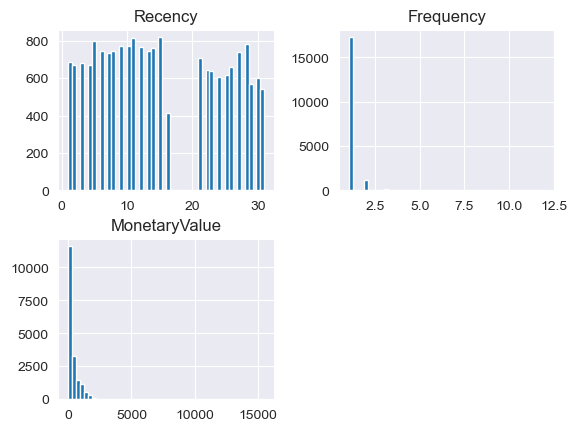

In [7]:
rfm_cluster.hist(bins=50);

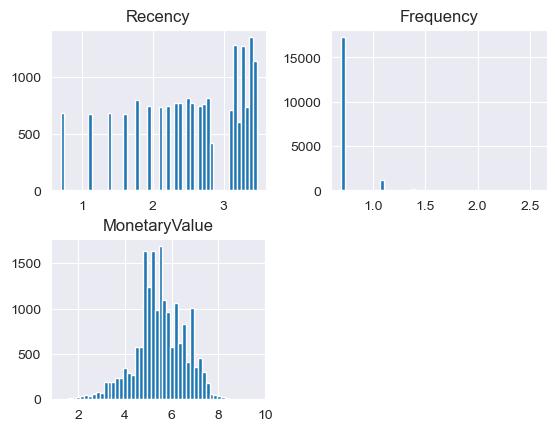

In [8]:
# rfm_cluster log 변환
rfm_cluster_log = np.log(rfm_cluster +1) #1를 더하는 이유: 데이터 값 중에 0이 존재하는 경우 무한대로 발산하기 때문입니다
rfm_cluster_log.hist(bins=50);

In [9]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,18684.000000,18684.000000,18684.000000
mean,2.551565,0.730160,5.501298
std,0.745280,0.140117,1.062553
min,0.693147,0.693147,1.238374
25%,2.079442,0.693147,4.886809
50%,2.639057,0.693147,5.499093
75%,3.218876,0.693147,6.229068
max,3.465736,2.564949,9.649111


## 스케일 조정하기

In [10]:
# sklearn.preprocessing 의 StandardScaler 로 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(rfm_cluster_log)
X = ss.transform(rfm_cluster_log)
X

array([[ 0.99867391, -0.26416645,  0.43539279],
       [ 1.18404587, -0.26416645, -0.28946526],
       [ 1.14004805, -0.26416645, -1.60057895],
       ...,
       [-2.49364962, -0.26416645,  0.60689294],
       [-2.49364962, -0.26416645,  1.80187251],
       [-2.49364962, -0.26416645,  1.01645366]])

In [11]:
pd.DataFrame(X).describe().round(2)

,0,1,2
count,18684.00,18684.00,18684.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-2.49,-0.26,-4.01
25%,-0.63,-0.26,-0.58
50%,0.12,-0.26,-0.00
75%,0.90,-0.26,0.68
max,1.23,13.10,3.90


## KMeans

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans.cluster_centers_, kmeans.inertia_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([[-1.12749234, -0.26416645, -0.06322867],
        [-0.35062674,  3.2388044 ,  0.93581446],
        [ 0.61597892, -0.26416645, -0.08298313]]),
 26811.996794792256)

In [13]:
# cluster.KMeans, metrics.silhouette_score 불러오기
# rfm_norm 값을 학습하고
# elbow 값을 보기위해 inertia_ 값을 리스트로 만듭니다.
# silhouette_score(X, kmeans.labels_) 값도 리스트로 만듭니다.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouettes = []
range_n_clusters = range(2, 20)


for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
    print(n_cluster, end=",")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19,

## Silhouette Score

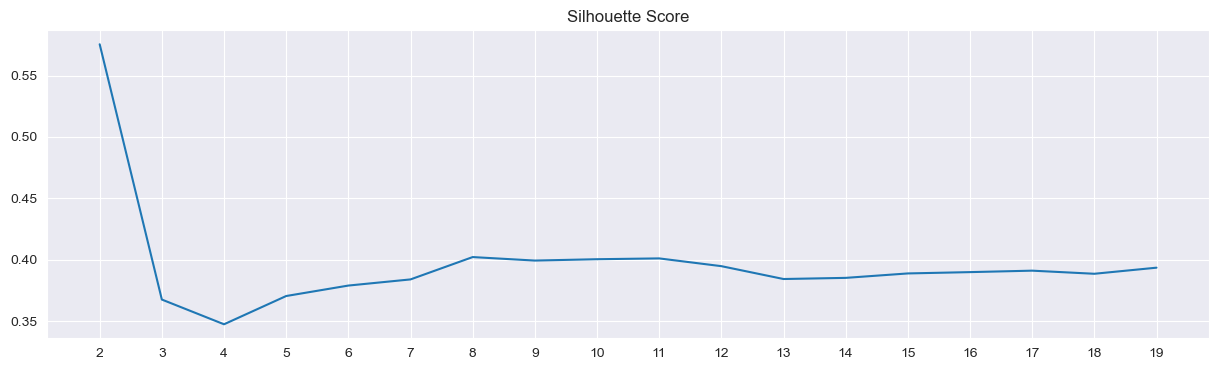

In [15]:
plt.figure(figsize=(15, 4))
plt.title('Silhouette Score')
plt.plot(range_n_clusters, silhouettes)
plt.xticks(range_n_clusters)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

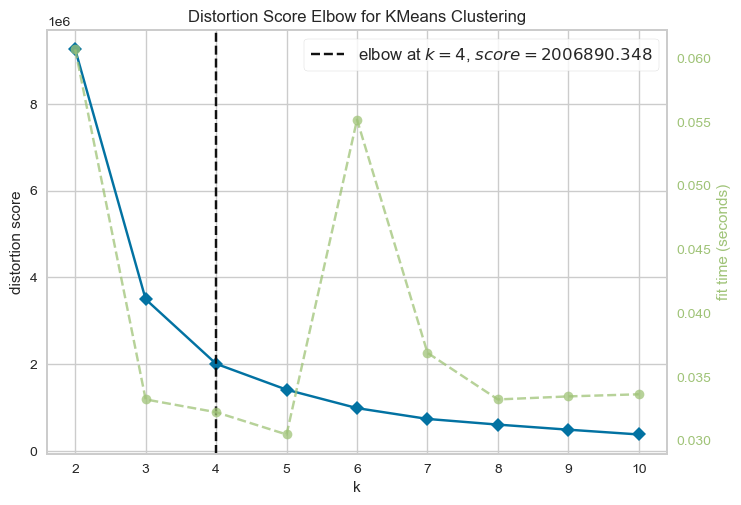

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

KEV = KElbowVisualizer(kmeans, k=10, n_init="auto")
KEV.fit(X)
KEV.show()


## 분석한 내용을 바탕으로 KMeans n_clusters 값을 정해 학습하기

In [18]:
ss = StandardScaler()
ss.fit(rfm_cluster_log)
X = ss.transform(rfm_cluster_log)
X

array([[ 0.99867391, -0.26416645,  0.43539279],
       [ 1.18404587, -0.26416645, -0.28946526],
       [ 1.14004805, -0.26416645, -1.60057895],
       ...,
       [-2.49364962, -0.26416645,  0.60689294],
       [-2.49364962, -0.26416645,  1.80187251],
       [-2.49364962, -0.26416645,  1.01645366]])

In [27]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [29]:
pd.Series(kmeans.labels_).value_counts()

2    11455
0     5820
1     1409
dtype: int64

In [30]:
# silhouette_score 구하기
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_avg

0.3676099234395872

In [31]:
rfm['cluster'] = kmeans.labels_
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,cluster
user_id,,,,,,,,,,
435648894,26,1,388.13,2,1,4,214,7,silver,2
437371552,30,1,179.14,1,1,2,112,4,silver,2


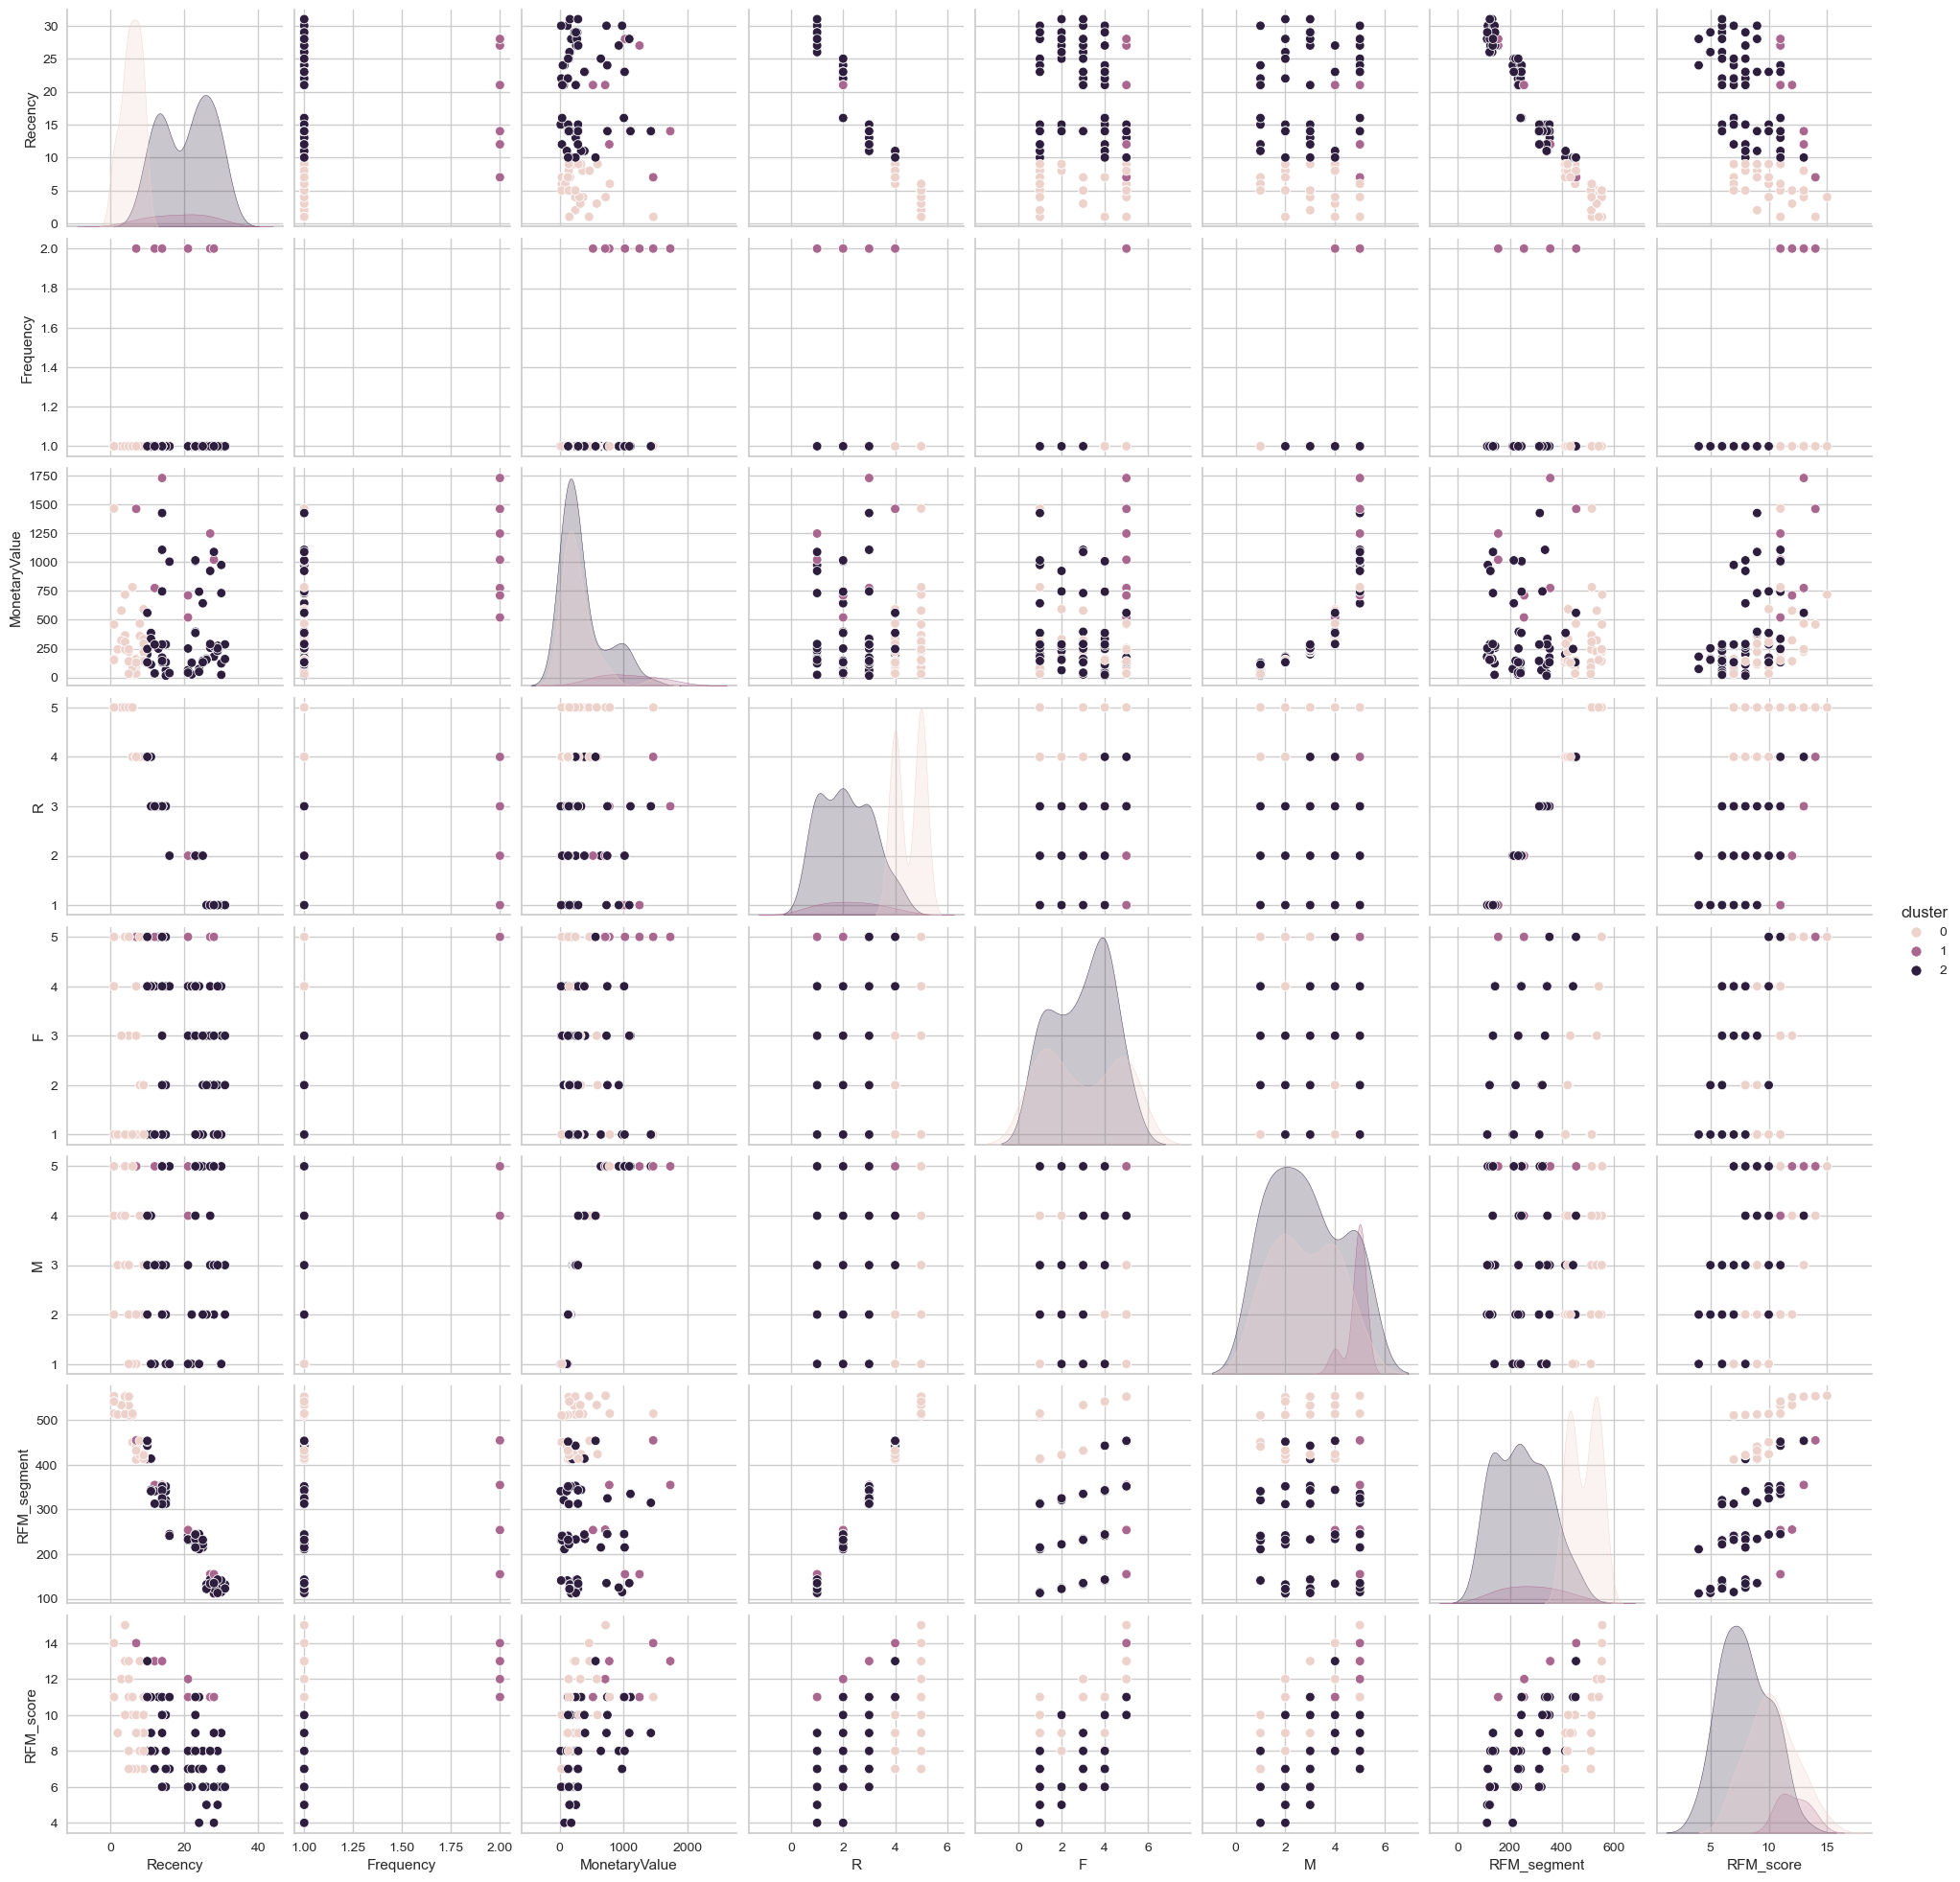

In [32]:
# pairplot( 오래 걸리기 때문에 rfm.sample() 일부만 그려보기) 
sns.pairplot(data = rfm.sample(100), hue='cluster',)

In [33]:
pd.crosstab(rfm['RFM_class'],rfm['cluster'])

cluster,0,1,2
RFM_class,,,
gold,1769,112,2989
platinum,2999,1269,1180
silver,1052,28,7286
